# Introduction
This case study aims to give us an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that we have learnt in the EDA module, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding
The people's incomplete or nonexistent credit history makes it difficult for the loan providers to grant loans to them. As a result, some customers take advantage of this and start defaulting. Assume you are employed for a consumer finance company that specializes in providing urban clients with a range of loans. To analyze the patterns found in the data, EDA is required. It will guarantee that those who apply and are able to repay the loan are approved.

Upon receiving a loan application, the company must choose whether to approve the loan based on the applicant's profile. The bank's choice carries two different kinds of risks:

The information on the loan application at that time is included in the data below.

# Business Objectives
The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

If we put it diffrently, Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. Company can utilise this knowledge for its portfolio and risk assessment.


# Data Understanding

# 1. 'application_data.csv'
It contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

# 2. 'previous_application.csv'
It contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

# 3. 'columns_description.csv'
It is data dictionary which describes the meaning of the variables.

In [117]:
#Import the warnings.

import warnings
warnings.filterwarnings('ignore')
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None) #so that large dataframes can be seen in output wholely

In [4]:
#Read the dataset of "application_data" in inp0 dataframe
inp0=pd.read_csv("application_data.csv")

In [5]:
#Display the first 5 records
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#checking dataframe shape 
inp0.shape

(307511, 122)

In [7]:
#checking  dataframe info
inp0.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [8]:
#check datatypes of each field in dataframe
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [9]:
#checking for percentage of missing values in each column
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [10]:
#checking for coloums having greater than 50% null value

emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values>50.0]
print(emptycol)
len(emptycol)

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

41

In [11]:
#Removing all columns having more than 50% null values
emptycol = list(emptycol[emptycol.values>=50.0].index)
inp0.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

41


In [12]:
#checking shape of the dataframe after removing columns
inp0.shape

(307511, 81)

In [13]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

# Conclusion:
##We can see that we have some null value in the columns.All these values are less than 50%

#Analysis of columns by checking less than 19% null value and checking if replacement is required or not


In [17]:
#checking for coloums having less than 19% null value
emptycol=inp0.isnull().sum()/len(inp0)*100
emptycol=emptycol[emptycol.values<19.0]
print(emptycol)
len(emptycol)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

71

# 1. Analysis of AMT_ANNUITY column

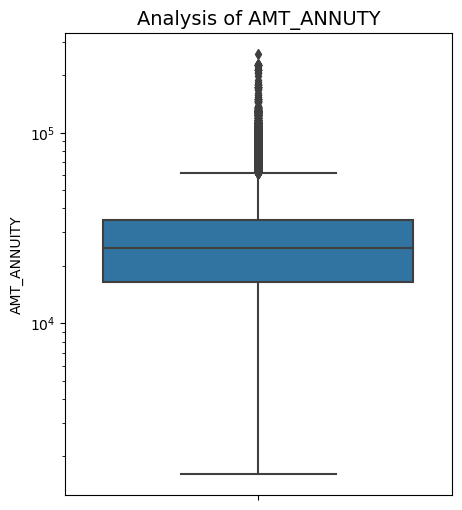

In [22]:
#plotting the values of AMT_ANNUITY column using box plot to detect outliers
plt.figure(figsize=(5,6))
sns.boxplot(y=inp0['AMT_ANNUITY'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_ANNUTY",fontsize=14)
plt.show()

In [23]:
#describe the info of column AMT_ANNUITY
print(inp0['AMT_ANNUITY'].mean())
print(inp0['AMT_ANNUITY'].median())
print(inp0['AMT_ANNUITY'].describe())

27108.573909183444
24903.0
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [24]:
#Verifying the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

12

In [25]:
# Filling missing values in column AMT_ANNUITY with median
fillMissingVal=inp0['AMT_ANNUITY'].median()
inp0['AMT_ANNUITY'].fillna(value = fillMissingVal, inplace =True)

In [26]:
#checking the count of missing value for AMT_ANNUITY column
inp0.AMT_ANNUITY.isnull().sum()

0

In [27]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

# 2. Analysis of CNT_FAM_MEMBERS

In [28]:
#checking count of family members
inp0['CNT_FAM_MEMBERS'].value_counts(dropna=False)

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
NaN          2
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

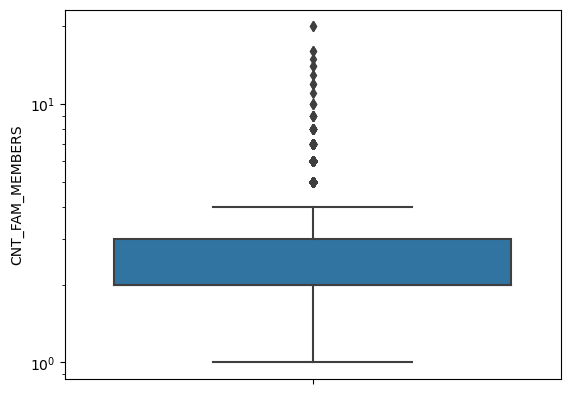

In [29]:
#plotting the values of CNT_FAM_MEMBERS column using box plot to detect outliers
sns.boxplot(y=inp0['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()

In [30]:
#describe the info of column CNT_FAM_MEMBERS
print(inp0['CNT_FAM_MEMBERS'].mean())
print(inp0['CNT_FAM_MEMBERS'].median())
print(inp0['CNT_FAM_MEMBERS'].describe())

2.152665450442101
2.0
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


In [31]:
# Filling missing values with median
fillMissingVal=inp0['CNT_FAM_MEMBERS'].median()
inp0['CNT_FAM_MEMBERS'].fillna(value = fillMissingVal, inplace =True)

In [32]:
#checking the count of missing value for CNT_FAM_MEMBERS column
inp0.CNT_FAM_MEMBERS.isnull().sum()

0

In [33]:
# Checking the columns having less null percentage
inp0.isnull().sum()/len(inp0)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

# Conclusion:
From the BoxPlot we can see that there are severe outliners and their is quite a difference between 75% and max.So we are taking median value to replace those null values.

# 3. Analysis of Code gender

In [34]:
#checking count of each gender M/F
inp0['CODE_GENDER'].value_counts(dropna=False)

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

# Conclusion:
As We can see that female(F) is having the majority and only 4 rows are having XNA values. So, there wont be any major impact in the dataset if we can update those columns with Gender 'F'.

In [35]:
#replace XNA with F and #checking count of each gender M/F
inp0.loc[inp0['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

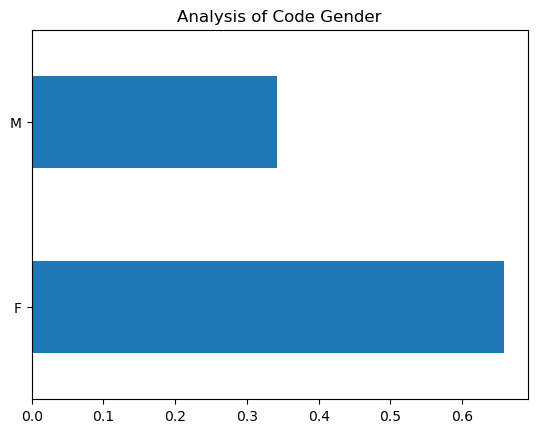

In [36]:
#plot the bar graph of CODE_GENDER
inp0['CODE_GENDER'].value_counts(normalize=True).plot.barh(title='Analysis of Code Gender')
plt.show()

# 4. Analysis of ORGANIZATION_TYPE

In [37]:
#checking count of each Type of organization where client works
inp0['ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [38]:
#describe the info of column ORGANIZATION_TYPE
print(inp0['ORGANIZATION_TYPE'].mode())
print(inp0['ORGANIZATION_TYPE'].describe())

0    Business Entity Type 3
Name: ORGANIZATION_TYPE, dtype: object
count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object


# Conclusion:
There are 55374 rows wit XNA value which is 18% of the total count. So we can discard them.


# 5. Analysis of AMT_GOODS_PRICE

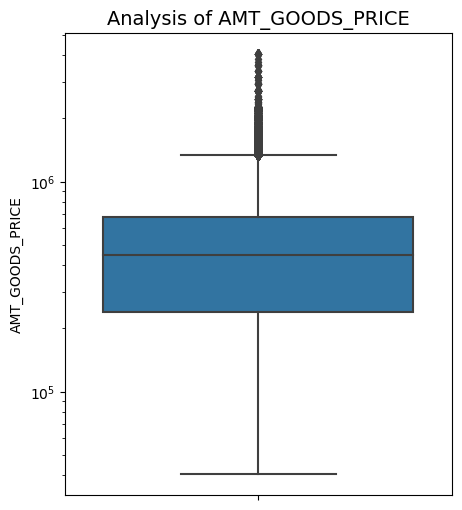

In [40]:
#box plotting the values of AMT_GOODS_PRICE
plt.figure(figsize=(5,6))
sns.boxplot(y=inp0['AMT_GOODS_PRICE'])
plt.yscale('log') #to display matplotlib.pyplot with a logarithmic y-axis scale.
plt.title("Analysis of AMT_GOODS_PRICE",fontsize=14)
plt.show()

In [41]:
#describe the info of column AMT_GOODS_PRICE
print(inp0['AMT_GOODS_PRICE'].describe())
print(inp0['AMT_GOODS_PRICE'].median())
print(inp0['AMT_GOODS_PRICE'].mean())
print(inp0['AMT_GOODS_PRICE'].max())
print(inp0['AMT_GOODS_PRICE'].min())

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
450000.0
538396.2074288895
4050000.0
40500.0


# Conclusion:
As we are not getting any clear understanding of the data, so we would keep the null values.

# 6. Analysis of AMT_REQ_CREDIT_BUREAU_DAY

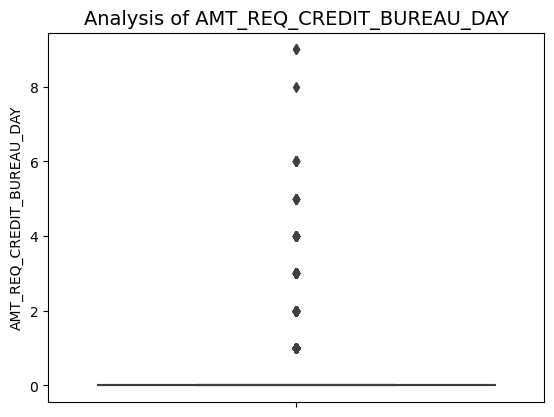

In [43]:
#box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=inp0['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.title("Analysis of AMT_REQ_CREDIT_BUREAU_DAY",fontsize=14)
plt.show()

In [44]:
#describe the info of column AMT_REQ_CREDIT_BUREAU_DAY
print(inp0['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


# Conclusion
As we can see the numerical column AMT_REQ_CREDIT_BUREAU_DAY has outliers so need to be removed or capped and for missing value fillup we will use median in this case.

# Handling outlier

In [46]:
#Removing outliers for the column AMT_REQ_CREDIT_BUREAU_DAY
col_of_outliers=['AMT_REQ_CREDIT_BUREAU_DAY']
for col in col_of_outliers:
    percentiles = inp0[col].quantile([0.01,0.99]).values
    inp0[col][inp0[col] <= percentiles[0]] = percentiles[0]
    inp0[col][inp0[col] >= percentiles[1]] = percentiles[1]

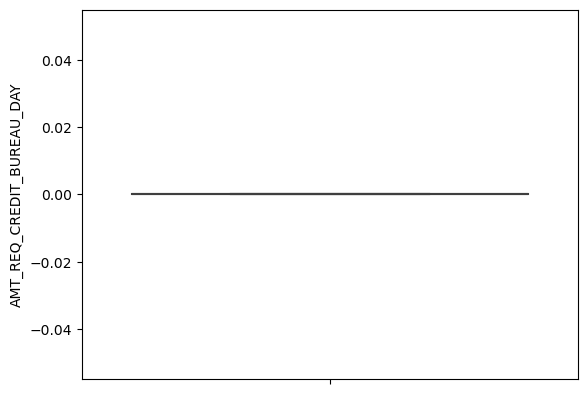

In [47]:
#box plotting the values of AMT_REQ_CREDIT_BUREAU_DAY
sns.boxplot(y=inp0['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.show()

# Changing the datatype for the required columns

In [48]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [49]:
# Casting all variable into numeric in the dataset
numeric_cols=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

inp0[numeric_cols]=inp0[numeric_cols].apply(pd.to_numeric)
inp0.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Binning

In [50]:
# Creating bins for income amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inp0['AMT_INCOME_RANGE']=pd.cut(inp0['AMT_INCOME_TOTAL'],bins,labels=slot)

In [51]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inp0['AMT_CREDIT_RANGE']=pd.cut(inp0['AMT_CREDIT'],bins=bins,labels=slots)

In [52]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0 = inp0.loc[inp0["TARGET"]==0]
target1 = inp0.loc[inp0["TARGET"]==1]

In [53]:
# Calculating Imbalance percentage
imbalance=round(len(target0)/len(target1),2)
imbalance

11.39

# Univariate analysis for categories

In [55]:
#reusable ploting function

def plotfunc(df,col,title,hue = None):
    
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title,fontsize=14)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright') 
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    plt.show()

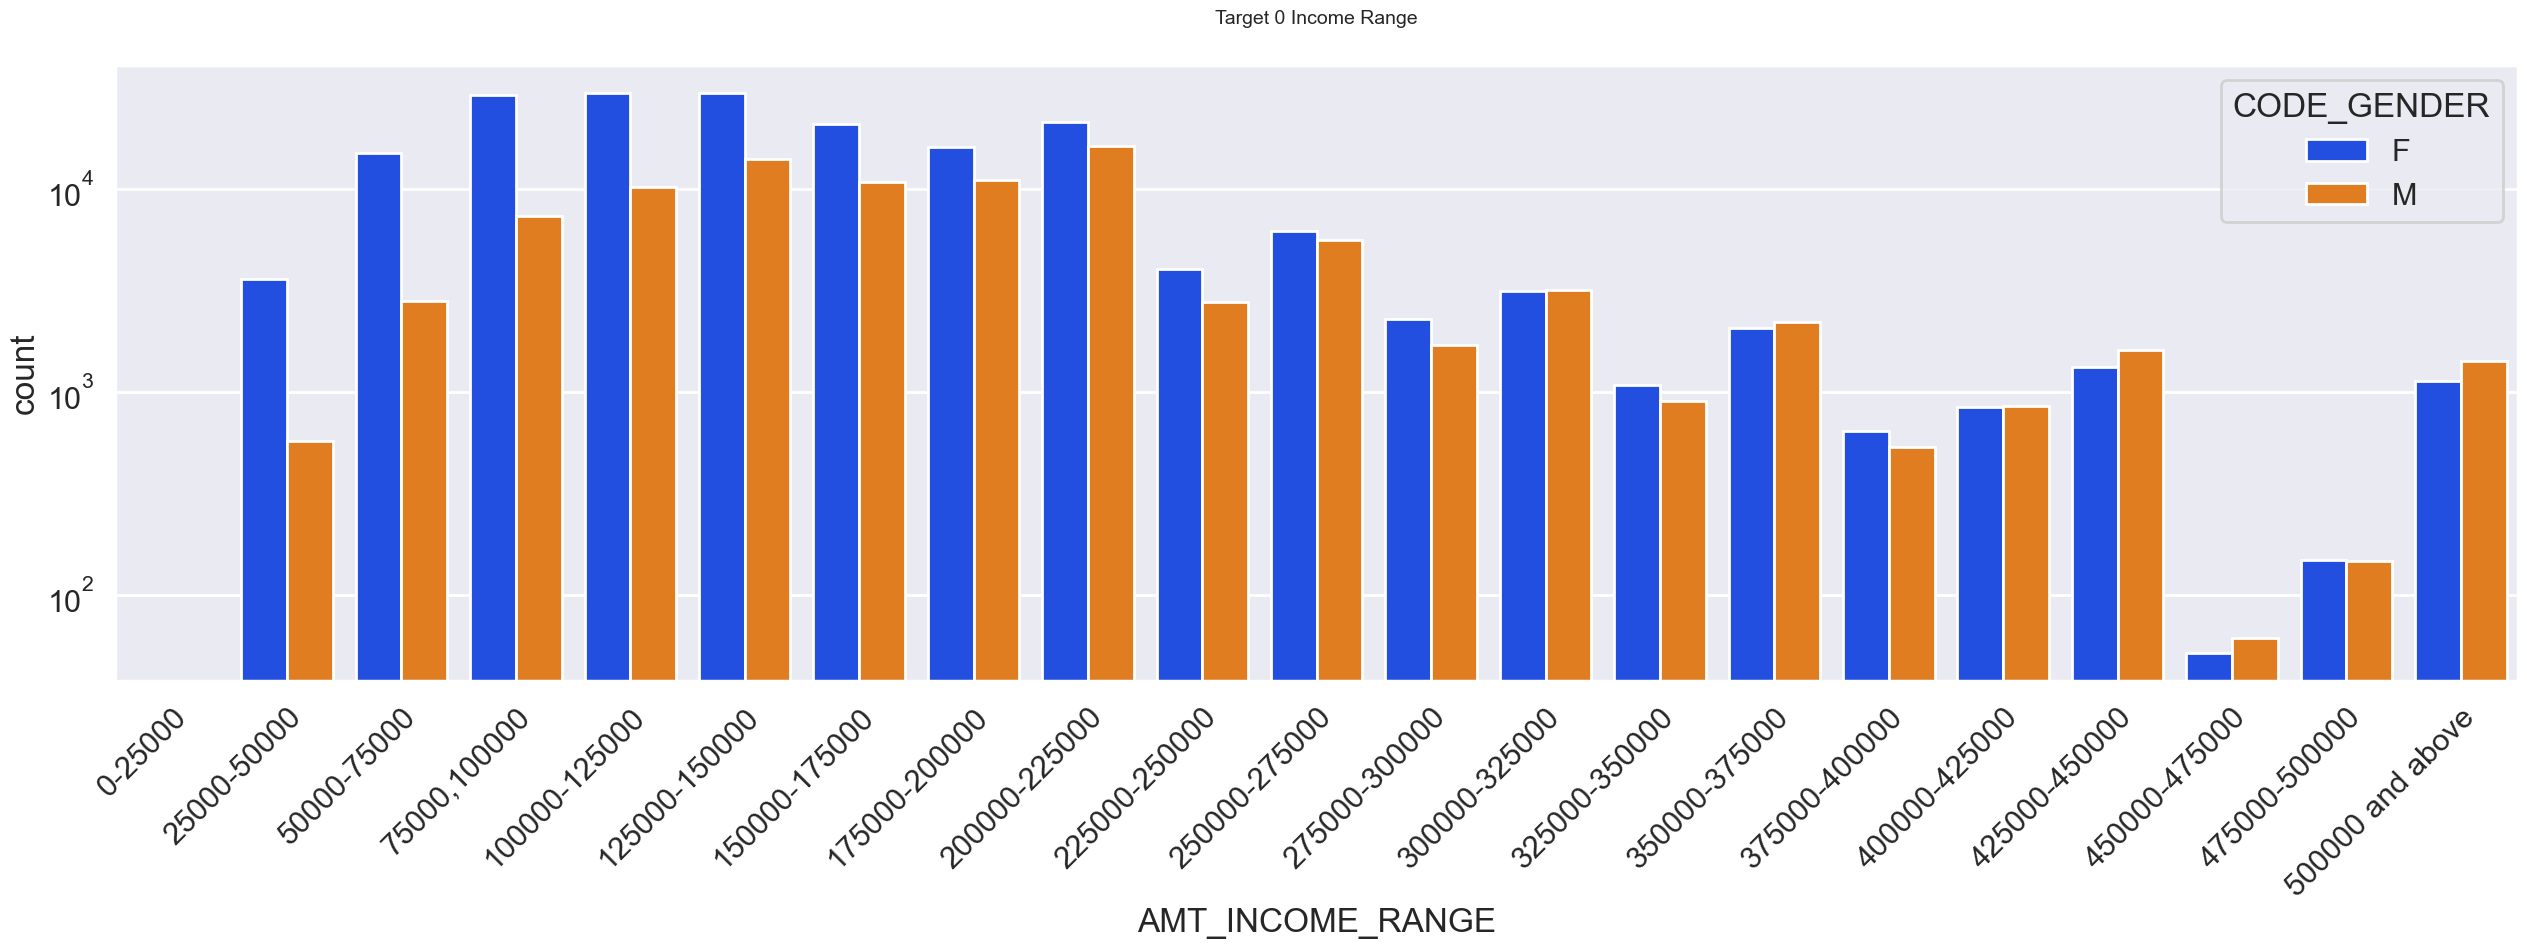

In [56]:
# Plotting for income range for target0
plotfunc(target0,col='AMT_INCOME_RANGE',title='Target 0 Income Range',hue='CODE_GENDER')

# Conclusion:

Points to be concluded from the above graph for target=0(Non-Defaulters).

1. Female counts are higher than male.
2. This graph show that females are more than male in having credits for that range.

3.Female Counts are Higher than Male: The graph indicates that the number of non-defaulters who are female is higher than the number of non-defaulters who are male. In other words, there are more female non-defaulters in the dataset for the specified range or category.

4.Females Have More Credits: The graph suggests that females in this particular category or range are more likely to have credits compared to males. It implies that among non-defaulters, females are more prevalent in this credit-related context.

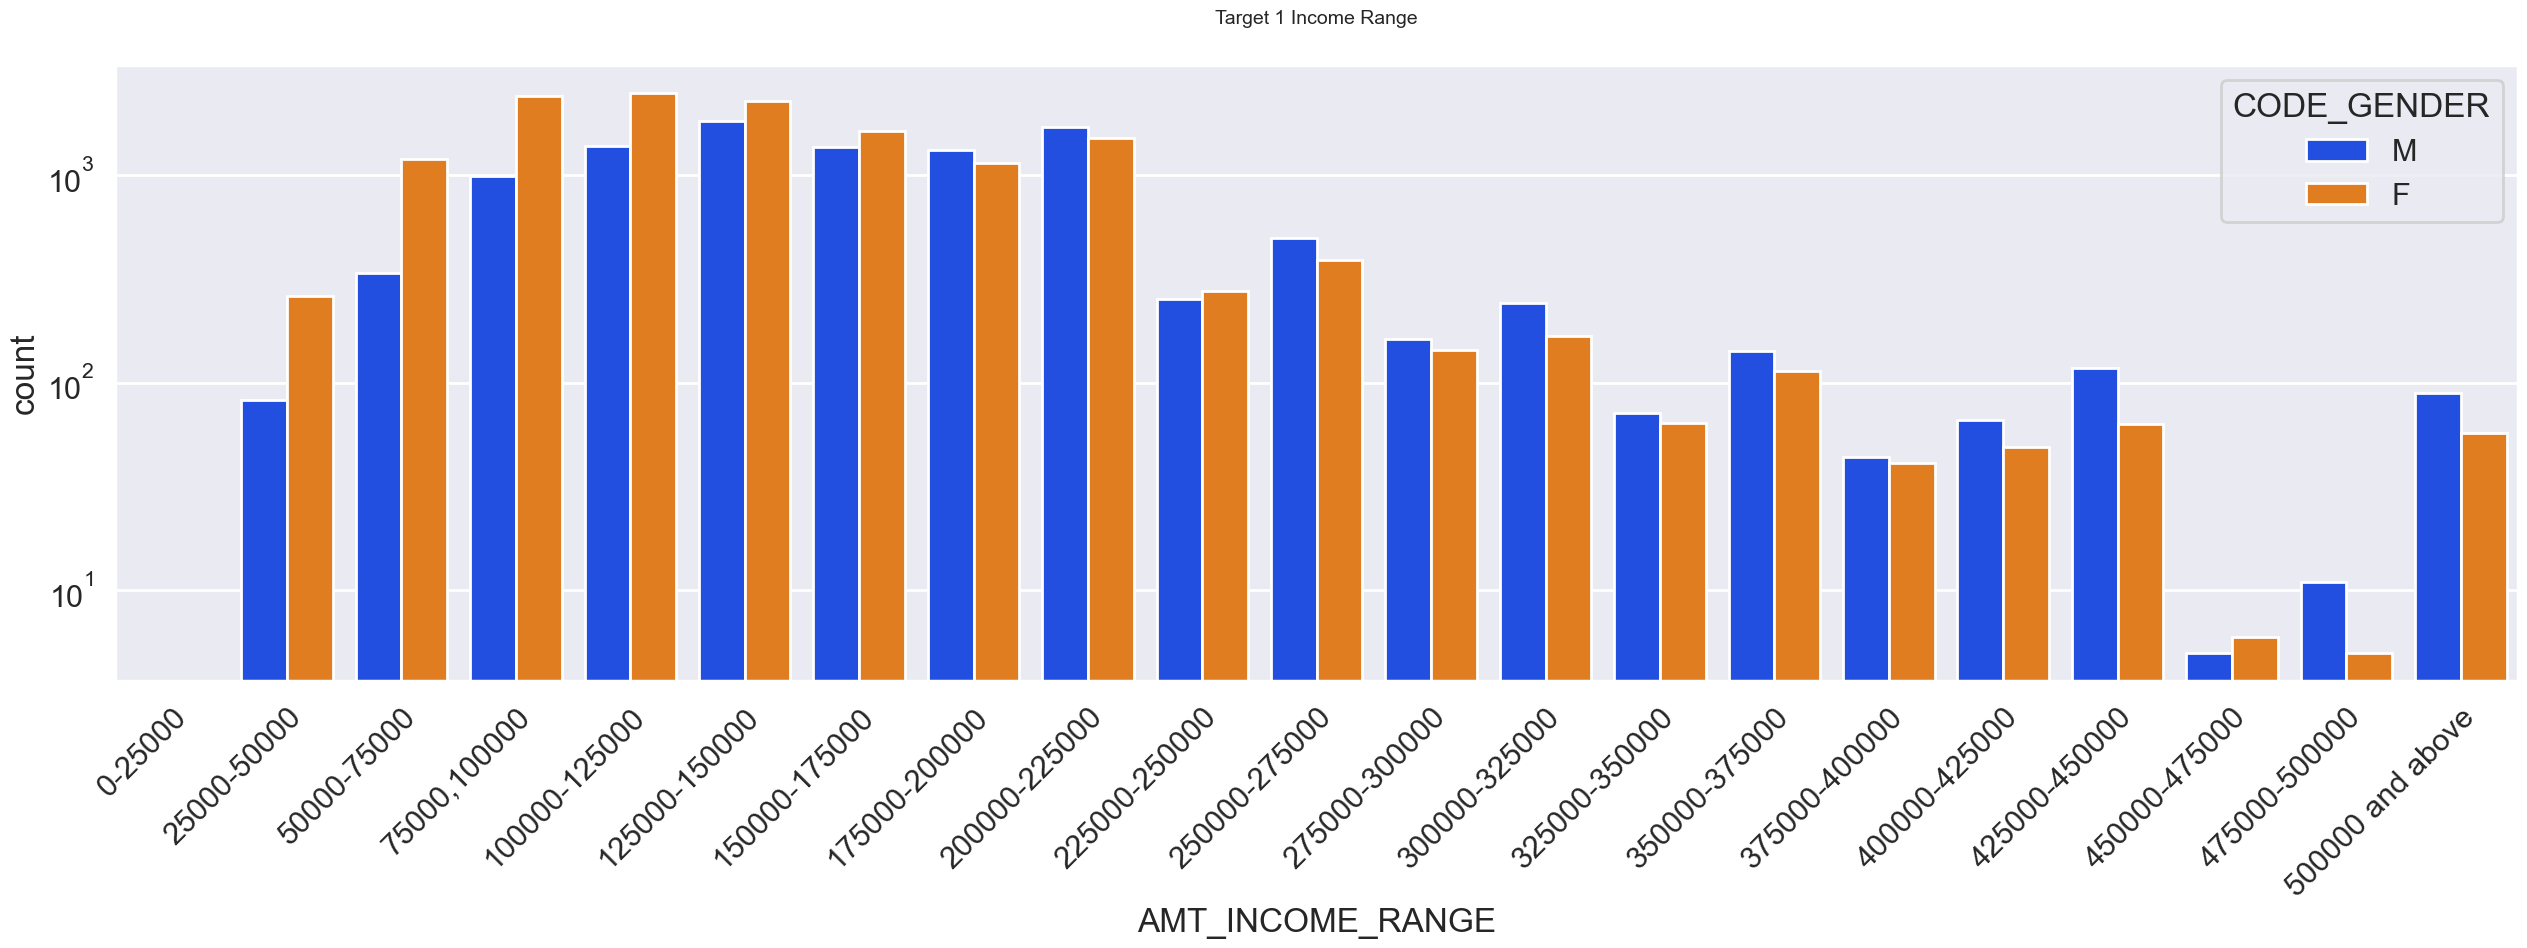

In [57]:
# Plotting for income range for target1
plotfunc(target1,col='AMT_INCOME_RANGE',title='Target 1 Income Range',hue='CODE_GENDER')

# Conclusion:

Points to be concluded from the above graph for Target=1 (Defaulters).

1. Male counts are higher than female.

2. This graph show that males are more than female in having credits between 100000 and 200000.

 3.Male Counts are Higher than Female: The graph indicates that the number of defaulters who are male is higher than the number of defaulters who are female. In other words, there are more male defaulters in the dataset for the specified range or category.

 4.Males Have More Credits Between 100,000 and 200,000: The graph suggests that among defaulters in this particular category or range (i.e., credits between 100,000 and 200,000), males are more prevalent than females. This means that, within this credit range, there are more male defaulters than female defaulters.

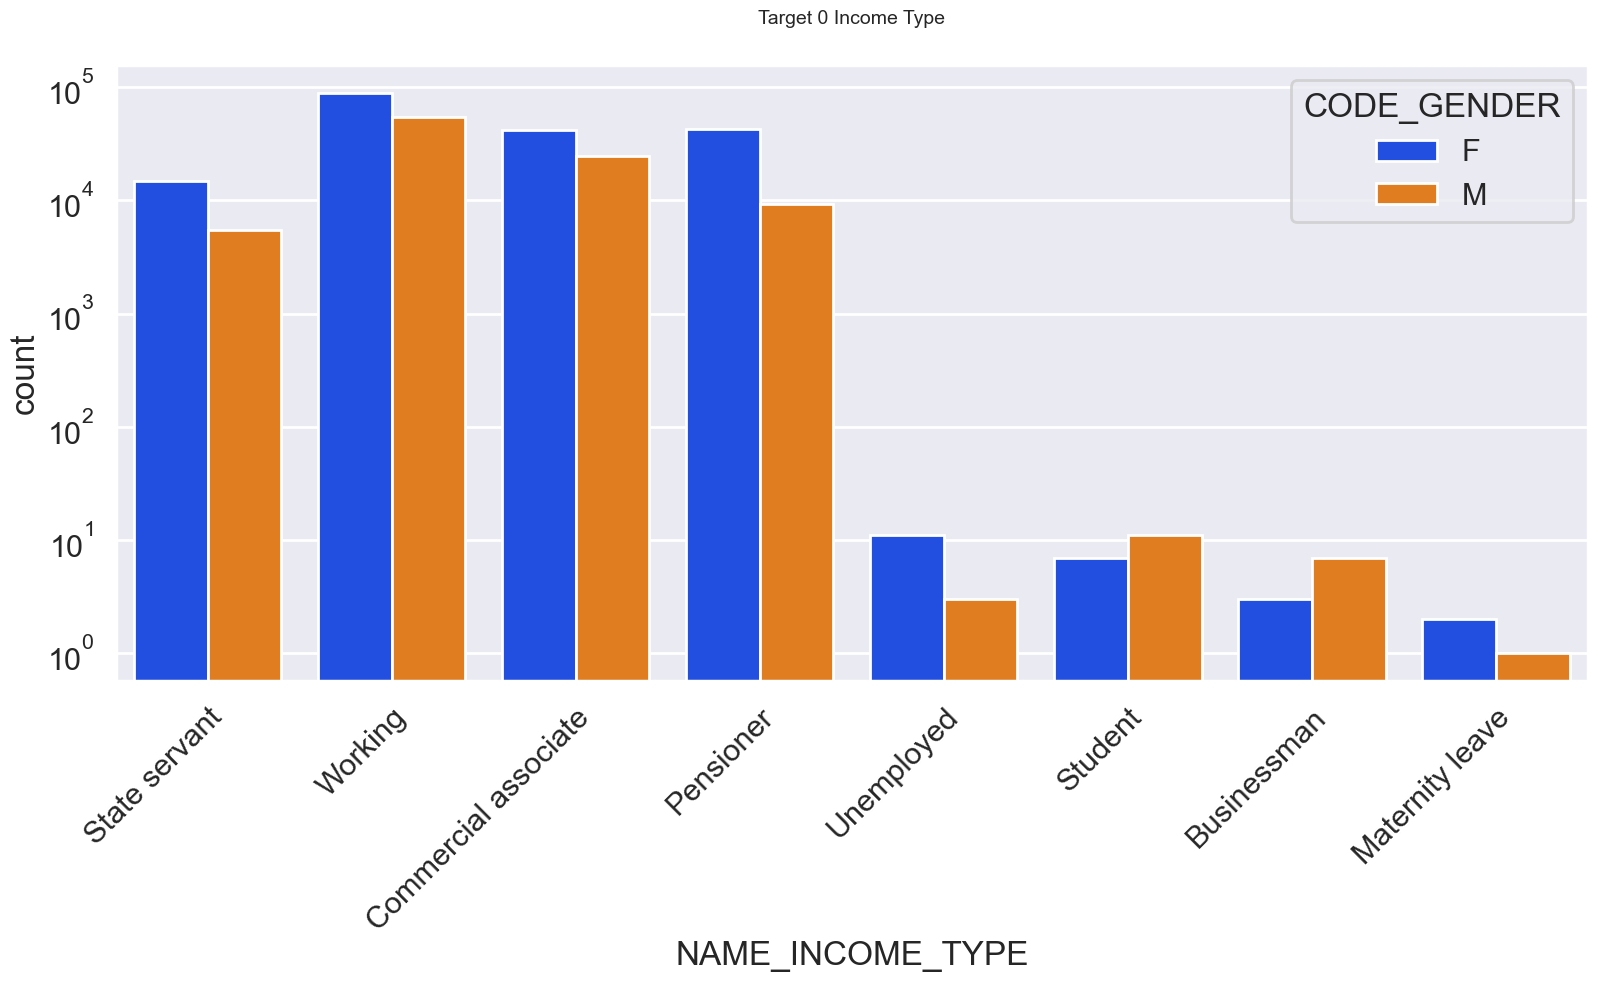

In [58]:
# Plotting for Income type for target 0
plotfunc(target0,col='NAME_INCOME_TYPE',title='Target 0 Income Type',hue='CODE_GENDER')

# Conclusion:

Points to be concluded from the above graph for Target=0 (Non-Defaulters).

1. Female are having more credit than males

2. High number of credit for income type working , commercial associate , pensioner and state servant

3. Low number of credit for income type student ,unemployed, businessman and maternity leave

4.Females Have More Credit Than Males: In this category of non-defaulters, females have a higher number of credits compared to males. This indicates that, among non-defaulters, females tend to have more credit-related transactions within the given context.

5.High Number of Credits for Multiple Income Types: It appears that non-defaulters with various income types, including "working," "commercial associate," "pensioner," and "state servant," have a high number of credits. This suggests that individuals with these income types are more likely to have multiple credit-related transactions without defaulting.

6.Low Number of Credits for Some Income Types: On the other hand, non-defaulters with income types such as "student," "unemployed," "businessman," and "maternity leave" have a lower number of credits. This implies that individuals with these income types are less likely to engage in multiple credit-related transactions within the given context of the graph.



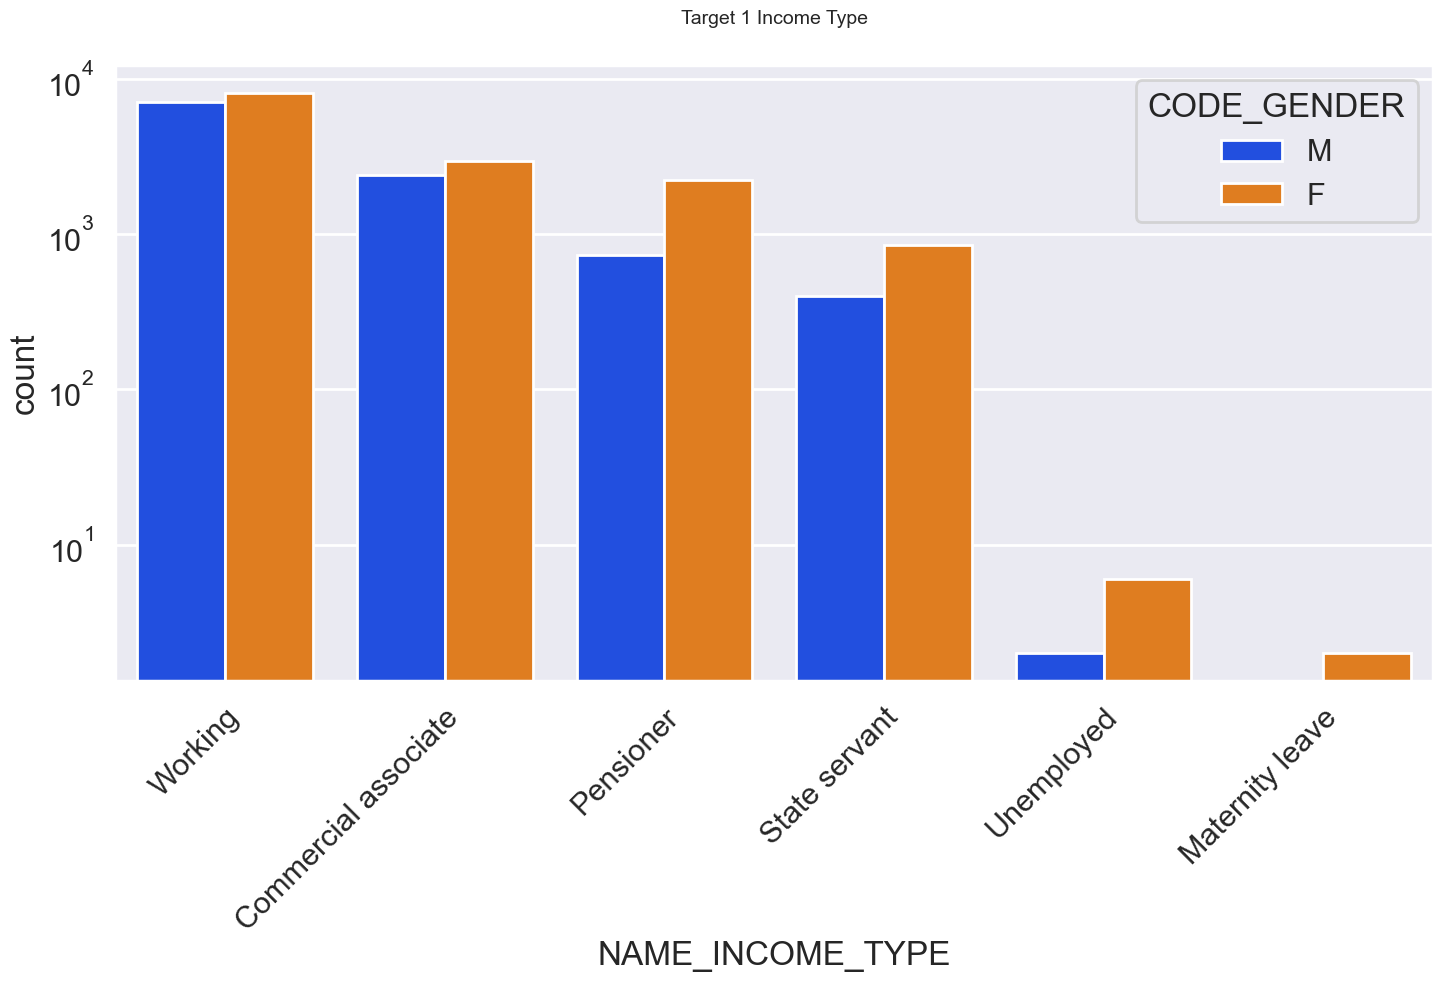

In [59]:
# Plotting for Income Type for target1
plotfunc(target1,col='NAME_INCOME_TYPE',title='Target 1 Income Type',hue='CODE_GENDER')

# Conclusion:

Points to be concluded from the above graph for Target=1 (Defaulters).

1. High number of credit for income type working , commercial associate , pensioner and state servant.Same as of target0

2. Low number of credit for income type unemployed and maternity leave.
  
  3.High Number of Credits for Certain Income Types: Defaulters with income types such as "working," "commercial associate," "pensioner," and "state servant" have a high number of credits. This is consistent with the observation made for non-defaulters (target=0) and suggests that individuals with these income types tend to have multiple credit-related transactions, regardless of their default status.

4.Low Number of Credits for Some Income Types: Defaulters with income types such as "unemployed" and "maternity leave" have a lower number of credits. This indicates that individuals with these income types are less likely to engage in multiple credit-related transactions within the given context of the graph.

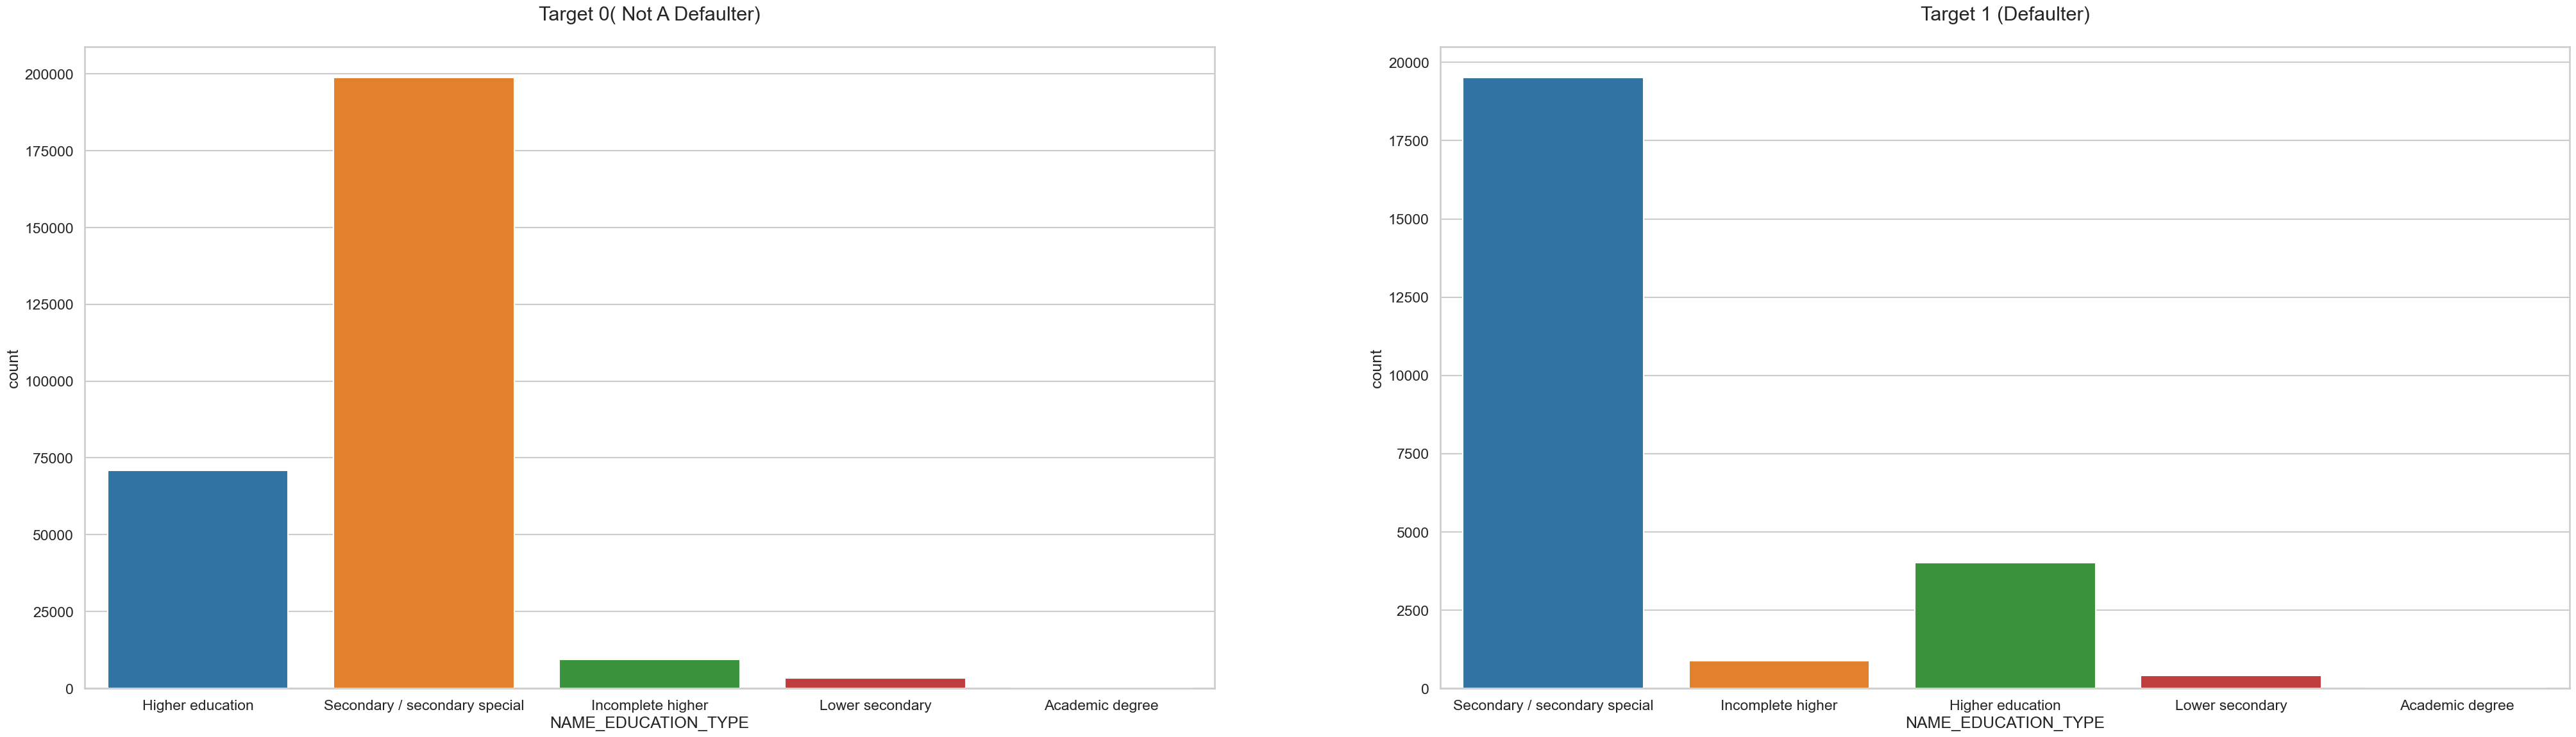

In [108]:
# Plotting for NAME_EDUCATION_TYPE for target0 and target1
fig, ax=plt.subplots(1,2,figsize=(50,13))
sns.countplot(target0,x='NAME_EDUCATION_TYPE', ax=ax[0]).set_title('Target 0( Not A Defaulter)')
sns.countplot(target1,x='NAME_EDUCATION_TYPE', ax=ax[1]).set_title('Target 1 (Defaulter)')
fig.show()

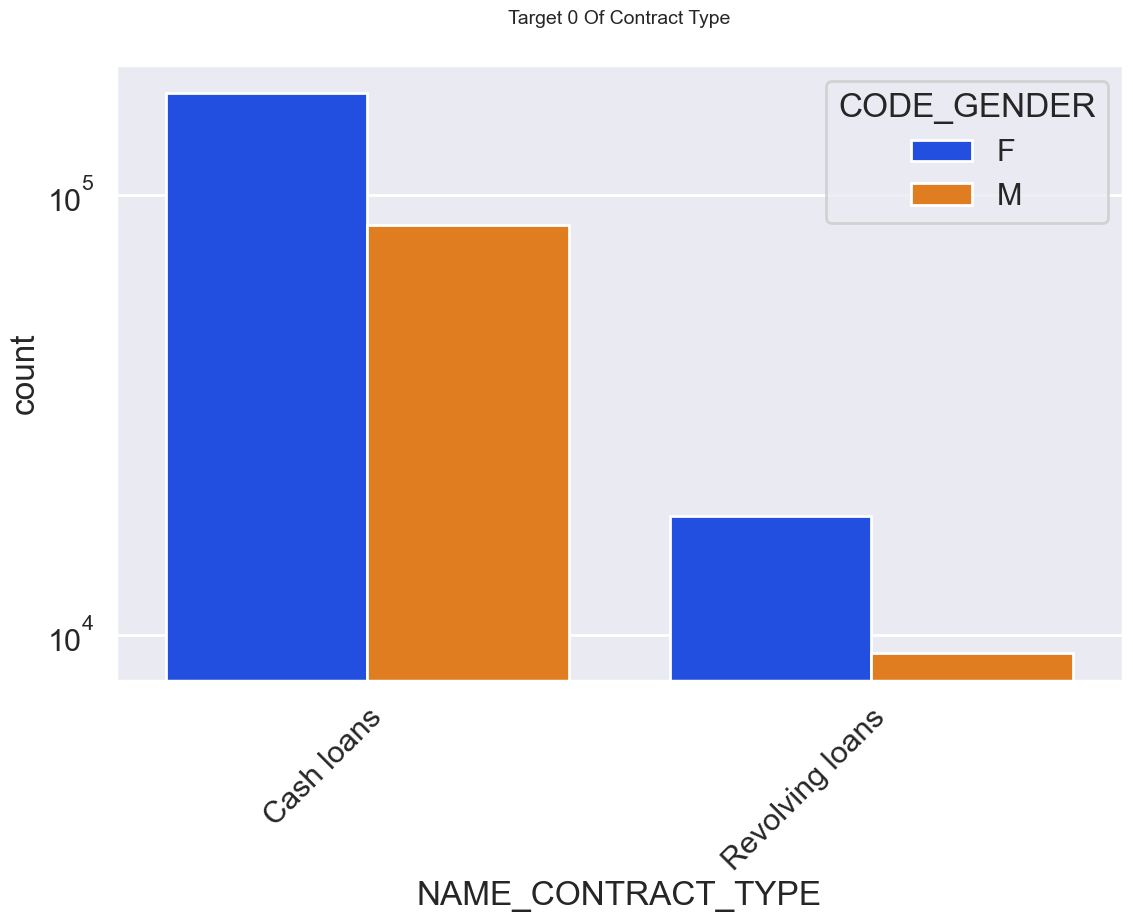

In [64]:
#Plotting for NAME_CONTRACT_TYPE for target0
plotfunc(target0,col='NAME_CONTRACT_TYPE',title='Target 0 Of Contract Type',hue='CODE_GENDER')

# Conclusion

Points to be concluded from the above graph for Target=0 (Non-Defaulters).

1. Cash Loan contracts have a higher number of credit than revolving loan contracts

2. Count of female is more.

   3.Cash Loan contracts have a higher number of credit than revolving loan contracts: This conclusion is based on the data shown in the graph, which suggests that among non-defaulters (Target=0), there is a larger proportion of cash loan contracts compared to revolving loan contracts.

4.Count of females is more: The graph indicates that among non-defaulters, the count of females is higher than the count of males. This suggests that a greater number of females are categorized as non-defaulters in the dataset.

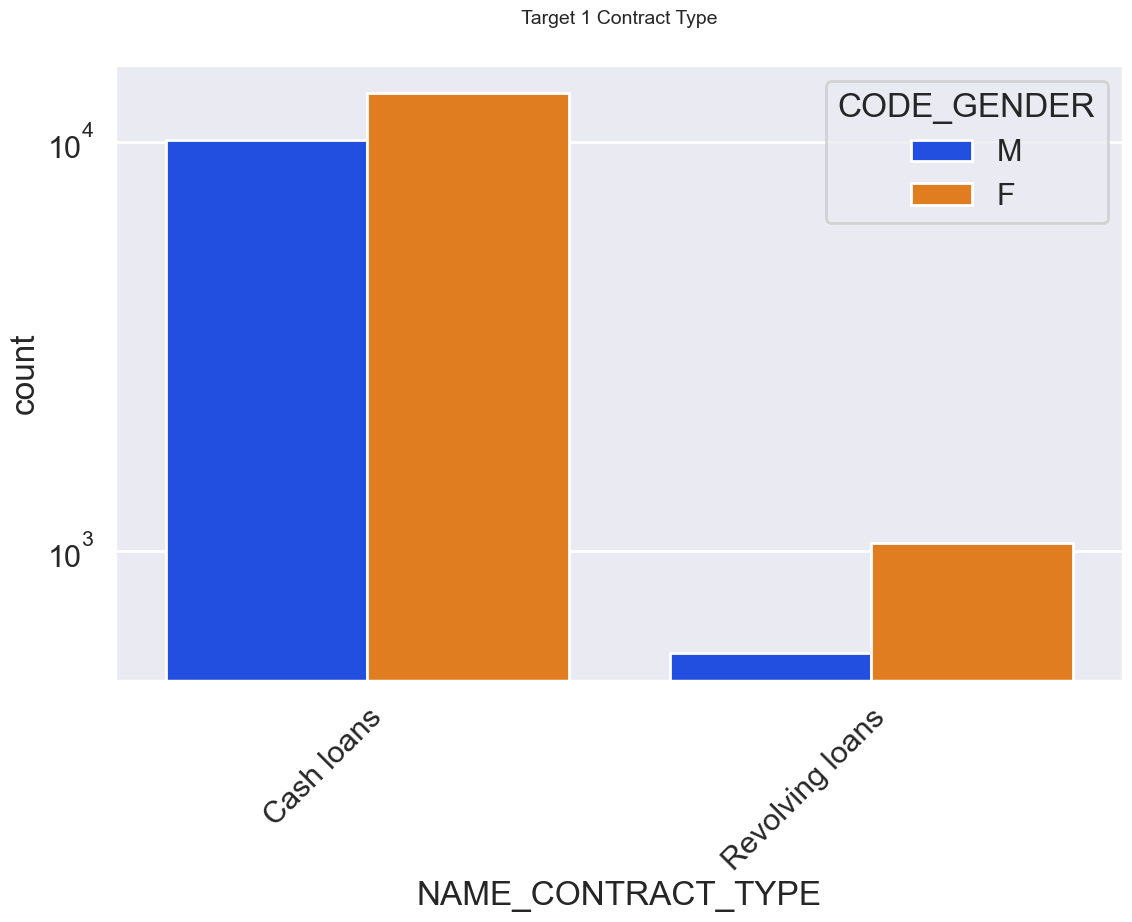

In [65]:
#Plotting for NAME_CONTRACT_TYPE for target1
plotfunc(target1,col='NAME_CONTRACT_TYPE',title='Target 1 Contract Type',hue='CODE_GENDER')

# Conclusion:

Points to be concluded from the above graph for Target = 1 (Defaulters).

1. Cash Loan contracts have a higher number of credit than revolving loan contracts

2. There is only female revolving loans.

# Continuous Univariate Analysis

In [66]:
# Function for box plot
def cusBoxPlot(data,col,title):
    sns.set_style('darkgrid')
    sns.set_context('poster')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =data, x=col,orient='v',color="orange")
    plt.show()

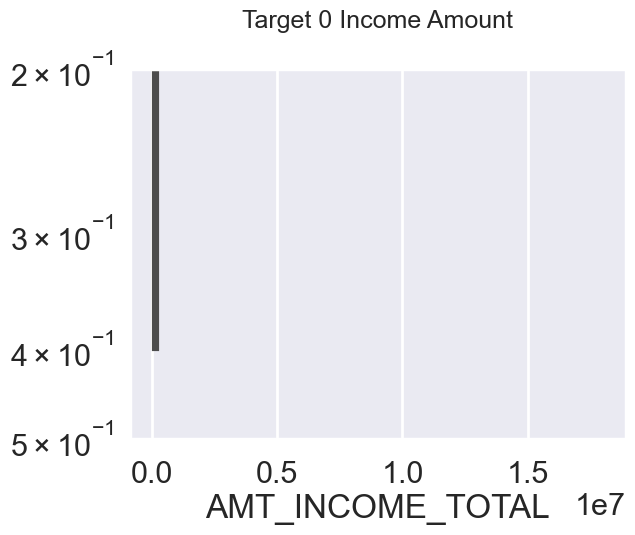

In [70]:
#Distribution of income amount for Target0
cusBoxPlot(data=target0,col='AMT_INCOME_TOTAL',title='Target 0 Income Amount')

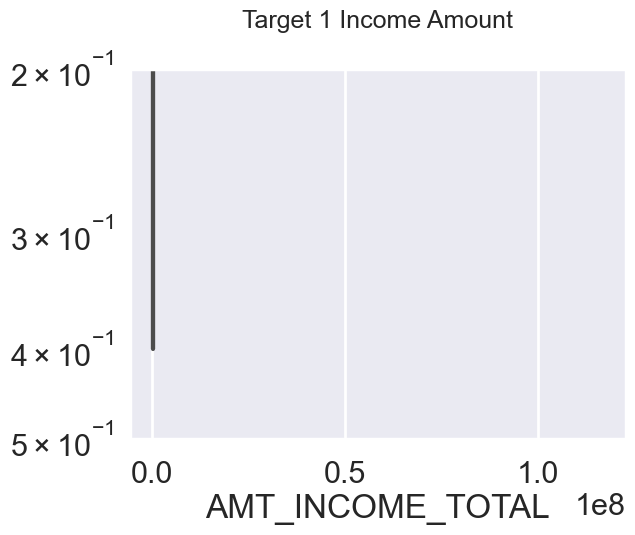

In [68]:
# Distribution of income amount for Target1
cusBoxPlot(data=target1,col='AMT_INCOME_TOTAL',title='Target 1 Income Amount')

# Conclusion:

Points to be concluded from the above 2 graph

1. Outliners in both graphs

2. 3rd quartile is narrow for target 1 and target 0

3. Most of the clients have income in the 1st quartile

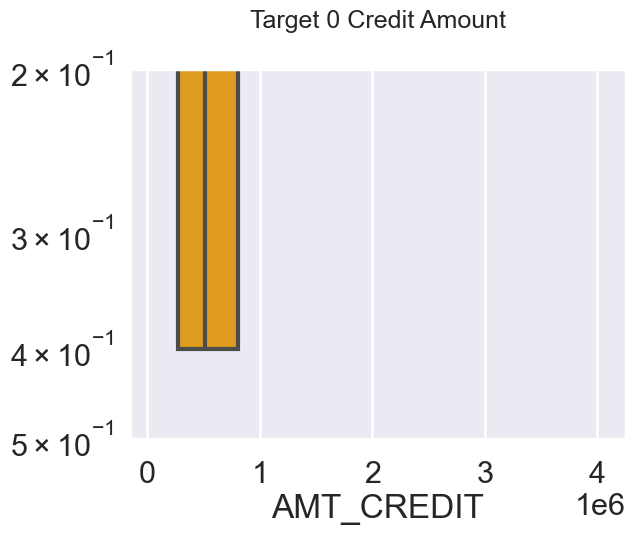

In [71]:
    # Disrtibution of credit amount for Target 0
cusBoxPlot(data=target0,col='AMT_CREDIT',title='Target 0 Credit Amount')

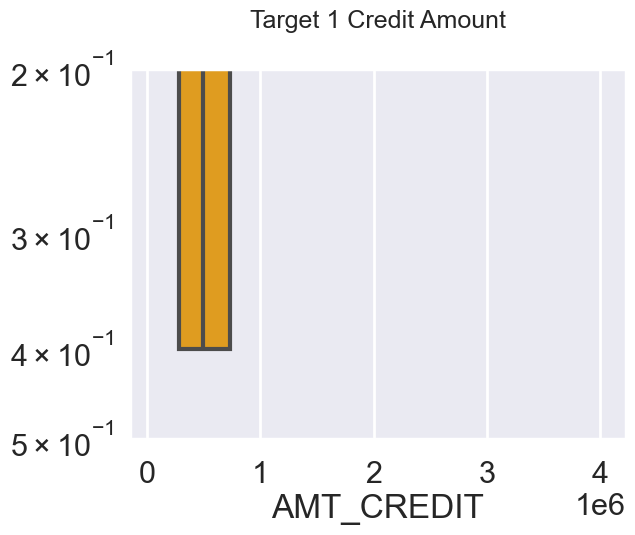

In [72]:
# Disrtibution of credit amount for Target 1
cusBoxPlot(data=target1,col='AMT_CREDIT',title='Target 1 Credit Amount')

# Conclusion:

Points to be concluded from the above 2 graph

1. Outliners in both

2. 3rd quartile is narrow for target 1 and target 0

3. Most of the clients have credit amount in the 1st quartile

# Bivariate Analysis

# Analysing correlation for numerical columns for both Target 0 and Target1

# Conclusion:
These columns have high correlation values for Target 0.


AMT_GOODS_PRICE and AMT_CREDIT
AMT_ANNUITY and AMT_CREDIT
AMT_ANNUITY and AMT_GOODS_PRICE
CNT_FAM_MEMBERS and CNT_CHILDREN
AMT_ANNUITY and AMT_INCOME_TOTAL
AMT_INCOME_TOTAL and AMT_GOODS_PRICE

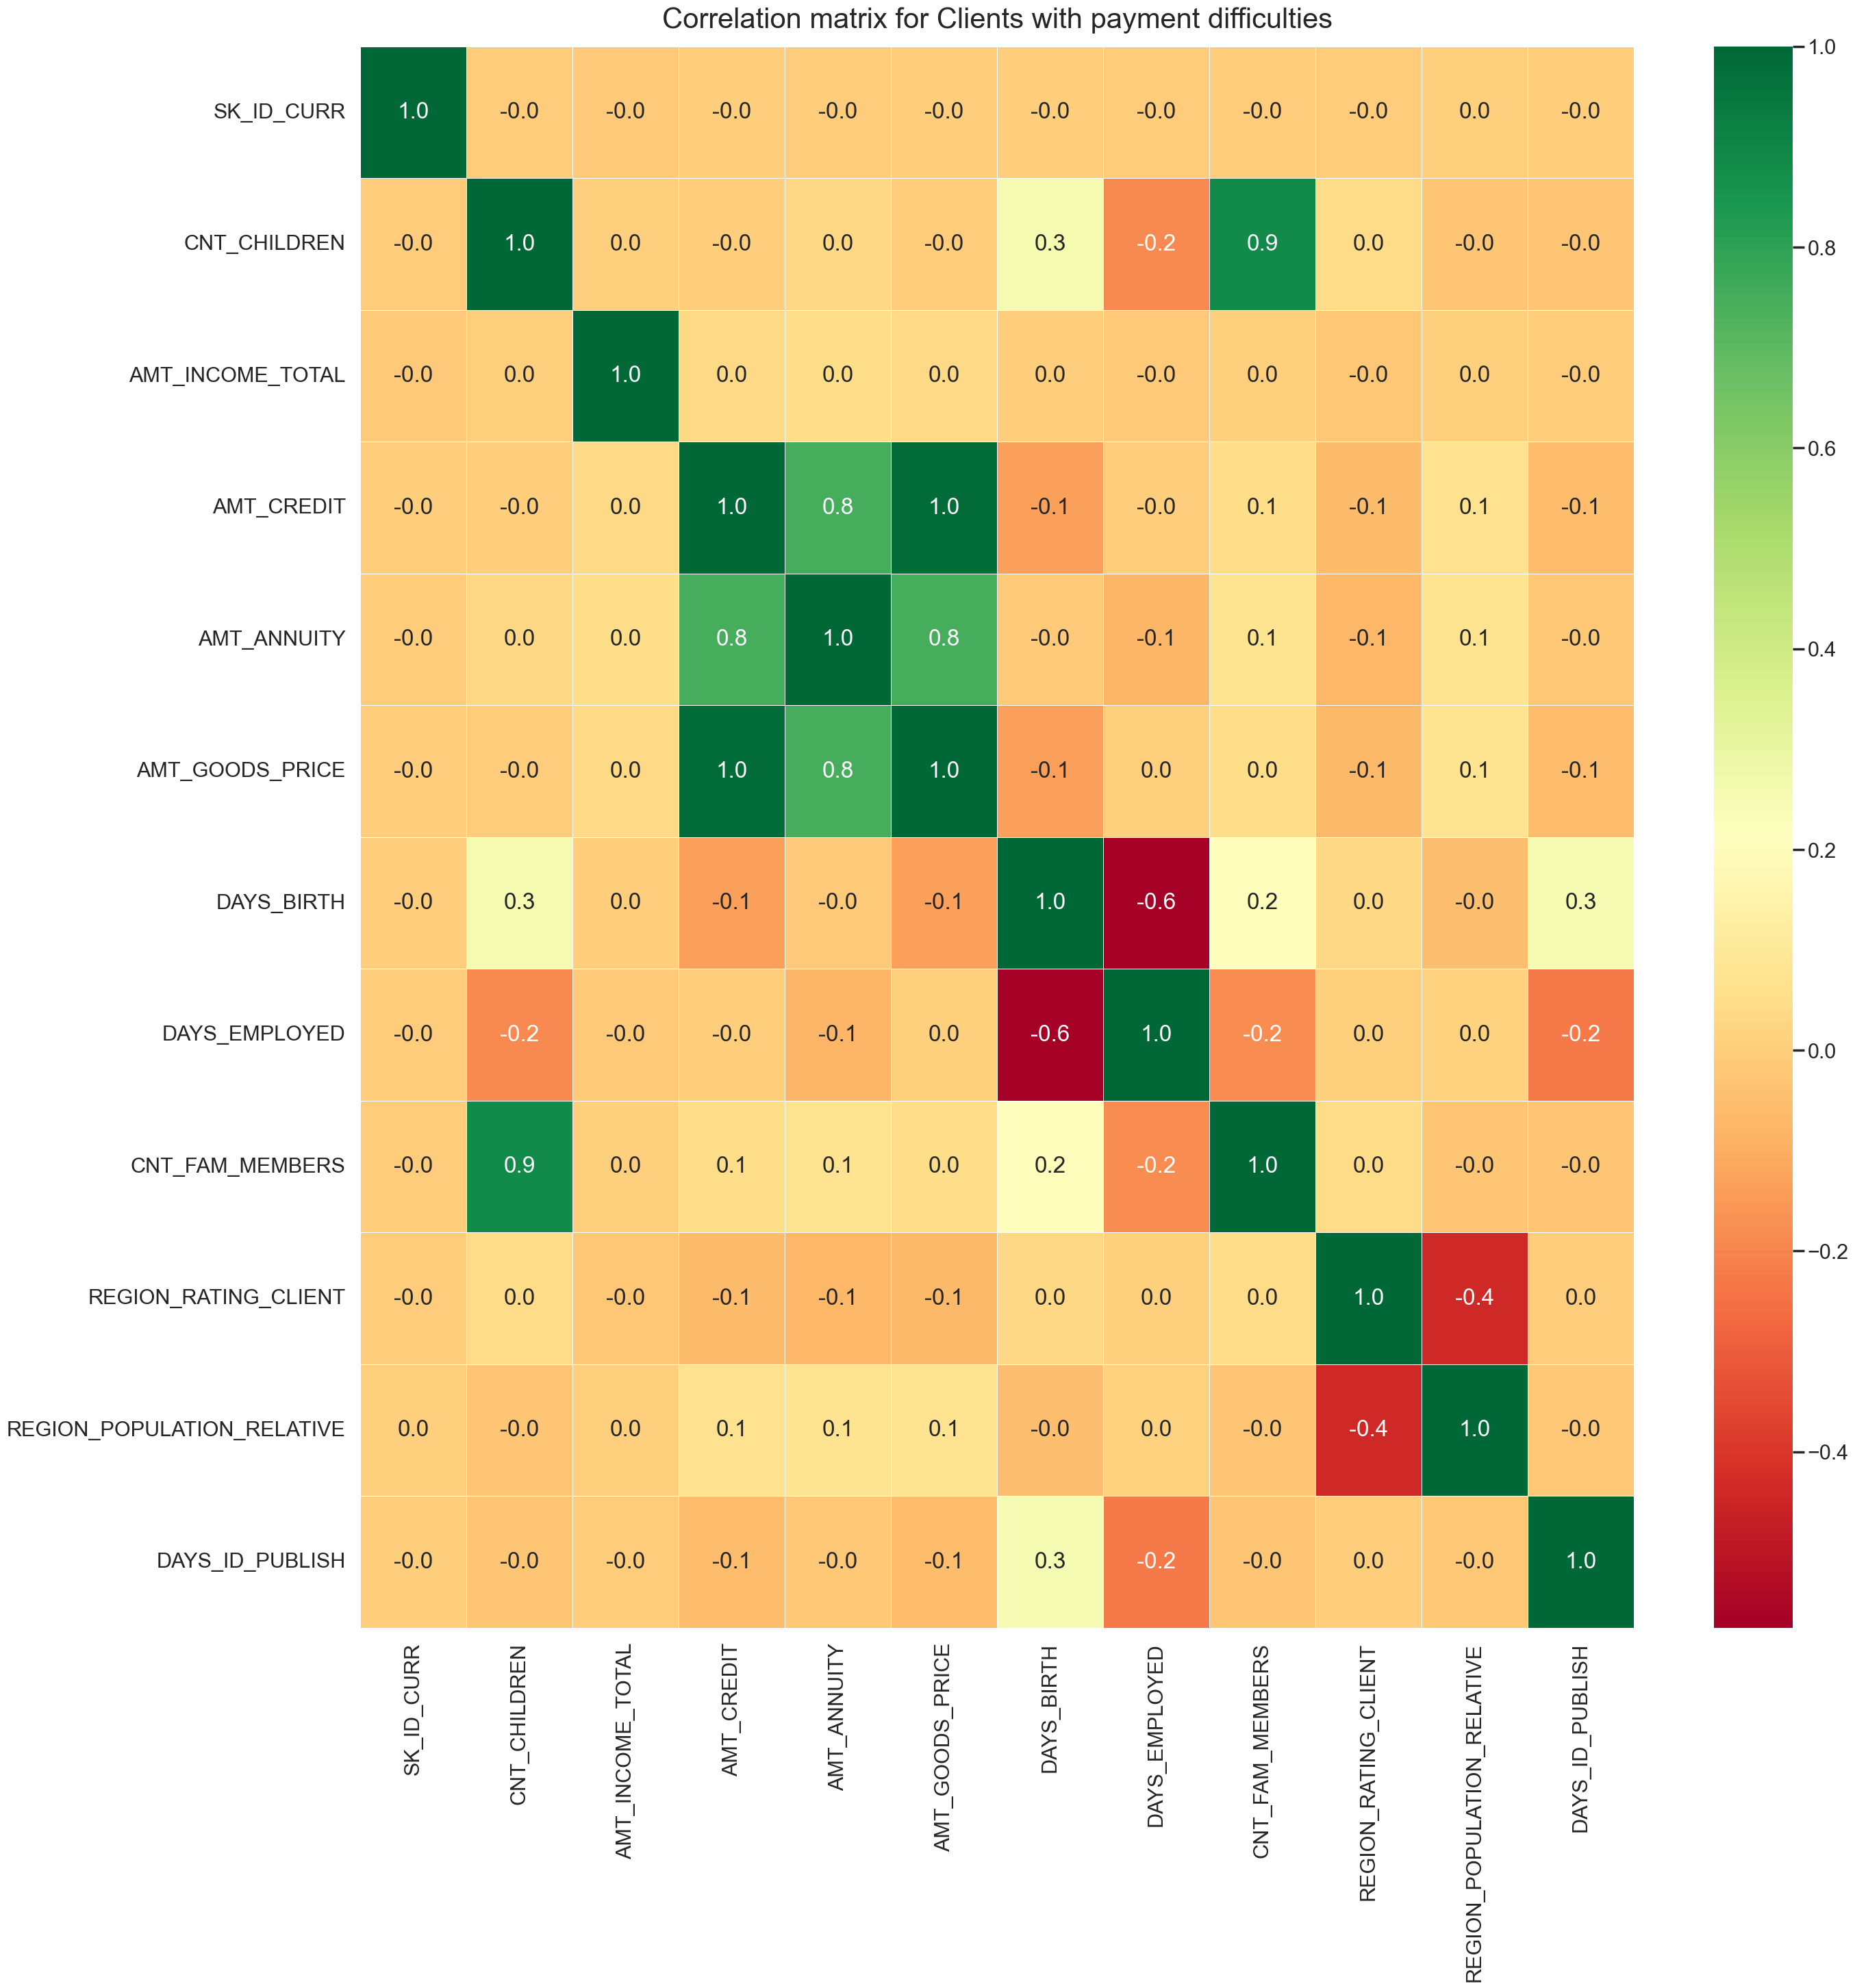

In [74]:
#Plotting Correlation matrix for Target 1 application data
d=target1[['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY',
                               'AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
                              'REGION_POPULATION_RELATIVE','DAYS_ID_PUBLISH']]
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(d.corr(), annot=True, fmt='.1f',cmap="RdYlGn", linewidths=.5, ax=ax)
plt.title("Correlation matrix for Clients with payment difficulties",fontsize=30, pad=20 )
plt.show()

# **Conclusion:
**Both for Target 0 and Target 1 these columns have high correlation values.

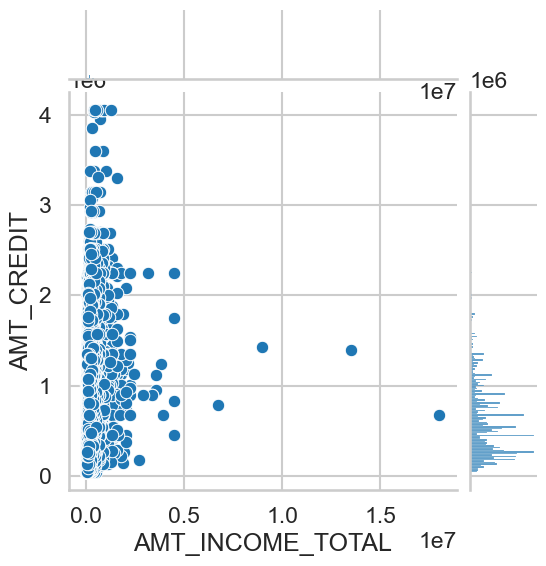

In [116]:
#ploting income vs credit for Target 0
sns.jointplot(data=target0, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
plt.show()

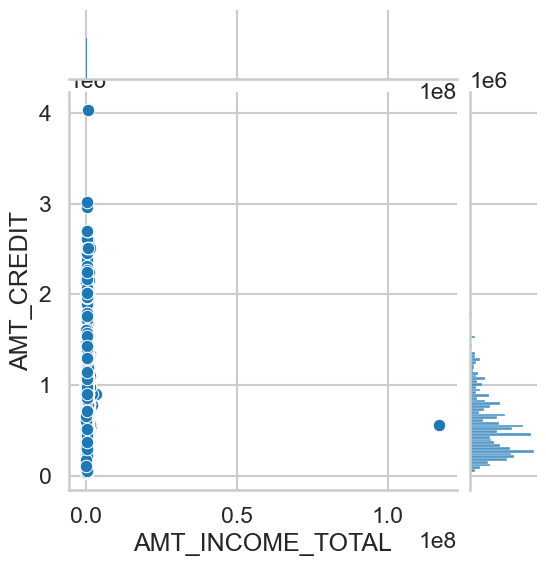

In [115]:
#ploting income vs credit for Target 1
sns.jointplot(data=target1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')
plt.show()

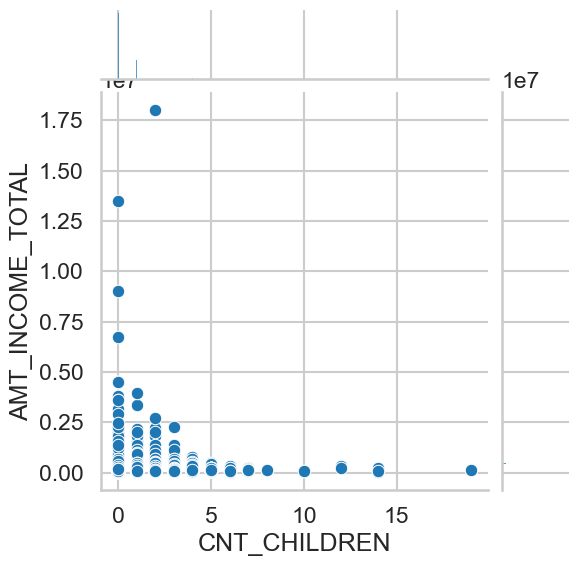

In [114]:
#ploting AMT_INCOME_TOTAL vs CNT_CHILDREN for Target 0
sns.jointplot(data=target0, x='CNT_CHILDREN', y='AMT_INCOME_TOTAL') 
plt.show()

# 1. Analysis of Credit amount with respect to Education status

Text(0.5, 1.0, 'Credit Amount vs Education Status For Traget 0')

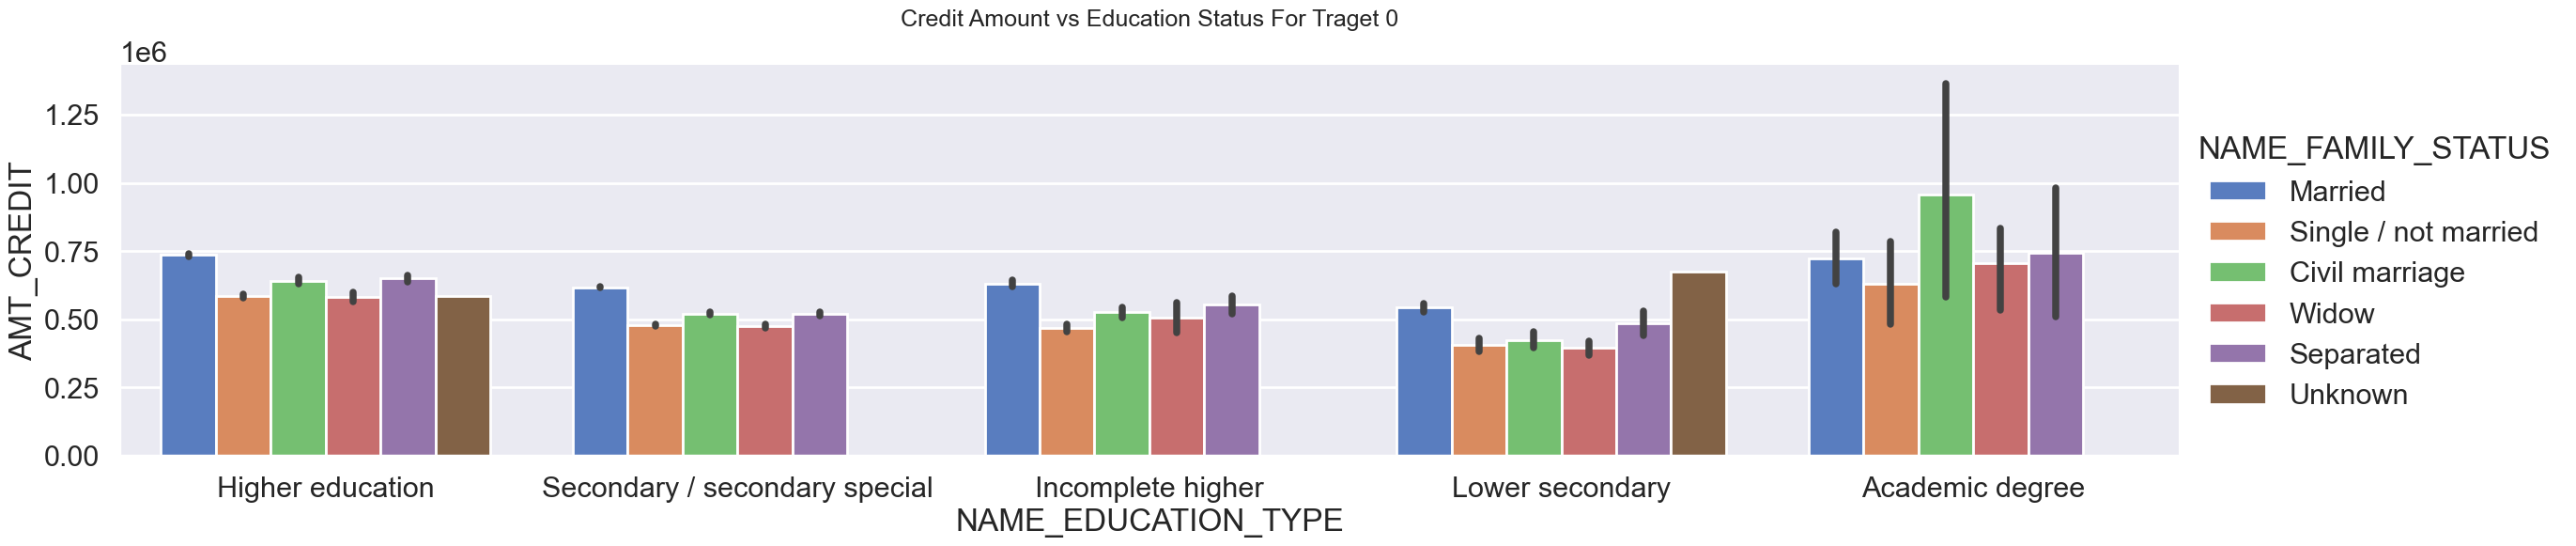

In [80]:
#ploting NAME_EDUCATION_TYPE vs AMT_CREDIT for each family status for Target 0
sns.catplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',height=6,aspect=4, kind="bar", palette="muted")
plt.title('Credit Amount vs Education Status For Traget 0')

# Inference:

Points to be concluded from the above graph for target = 0 (Non-Defaulters).

1. Customers holding academic degree have greater credit amount, Civil marriage segment being the highest among them.

2. Lower educated customers tends to have lower credit amount, Widows being the lowest among them

3. Married customers in almost all education segment except lower secondary and academic degrees have a higher credit amount.

# Inference:

Points to be concluded from the above graph for target = 1 (Defaulters).

1. Married Academic degree holding customers generally have a higher credit amount and so their defaulting rate is also high

2. Accross all education segment married customer tends to have higher credit amount

3. Customers holding lower eductation tends to have a lower credit amount

4. Single and Married are the only 2 family types present in academic degree .


5.Married Academic degree-holding customers generally have a higher credit amount, and their defaulting rate is also high: The graph suggests that among customers with an academic degree who are classified as defaulters (Target=1), those who are married tend to have a higher credit amount compared to their counterparts. Additionally, the defaulting rate among married customers with academic degrees appears to be higher.

6.Across all education segments, married customers tend to have a higher credit amount: The graph indicates that, irrespective of their education level, married customers tend to have a higher credit amount when classified as defaulters. This suggests that marital status may be a significant factor in credit amounts for defaulting customers.

7.Customers holding lower education levels tend to have a lower credit amount: The data in the graph shows that customers with lower education levels (e.g., Academic degree, Lower secondary, Incomplete higher, etc.) generally have lower credit amounts when they are classified as defaulters (Target=1). This implies that education level may be inversely correlated with credit amount for defaulting customers.

8.Single and Married are the only two family types present in academic degree: The graph reveals that among customers with an academic degree who are classified as defaulters, the family types Single and Married are the only two categories present. This suggests that for customers with academic degrees who default, there are no other family types in the dataset.

# 2. Analysis of Income amount with respect to Education Status

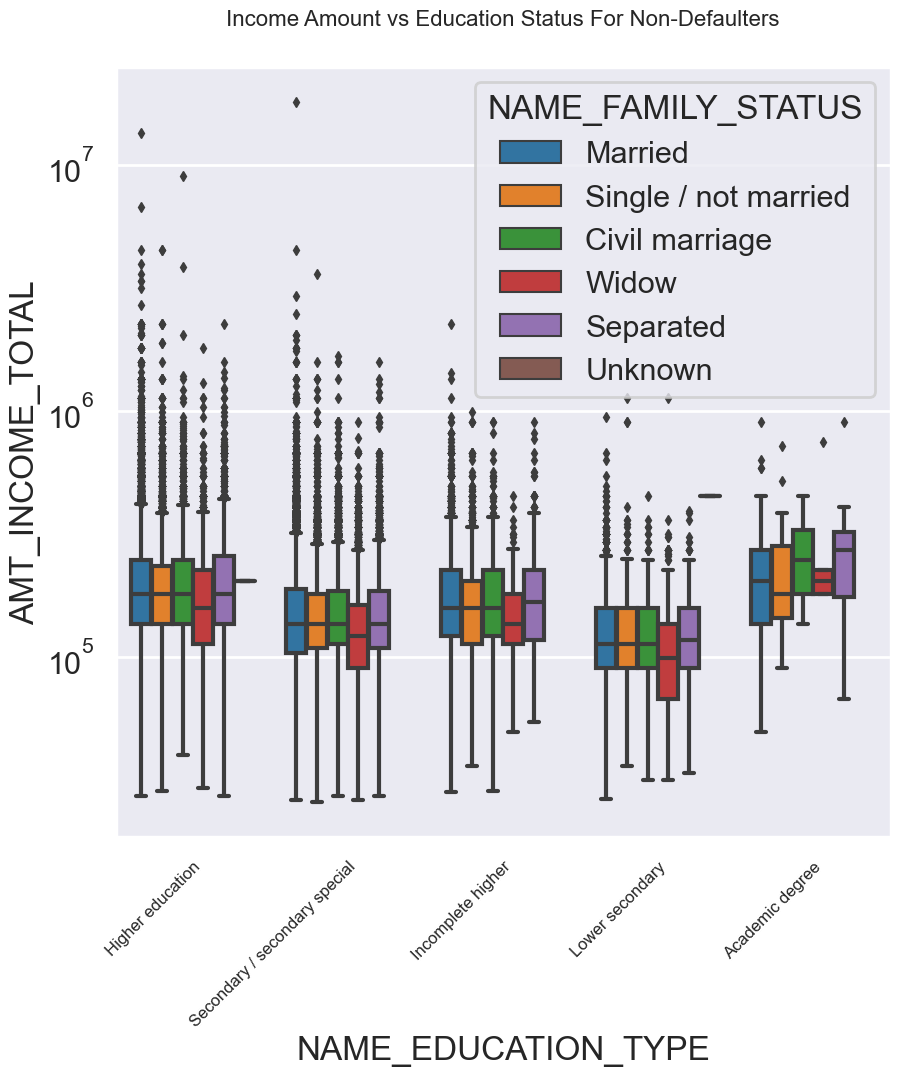

In [83]:
# Box plotting for Income amount vs Education Status for Target 0 in logarithmic scale

import textwrap
plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
g1=sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Non-Defaulters',fontsize=16)
plt.show()

# conclusion:

Points to be concluded from the above graph for target = 0 (Non-Defaulters).

1. For Education type 'Higher education' the income amount mean is mostly equal with family status. It does contain many outliers.

2. Less outlier are having for Academic degree but they are having the income amount is little higher that Higher education.

3. Lower secondary of civil marriage family status are have less income amount than others.

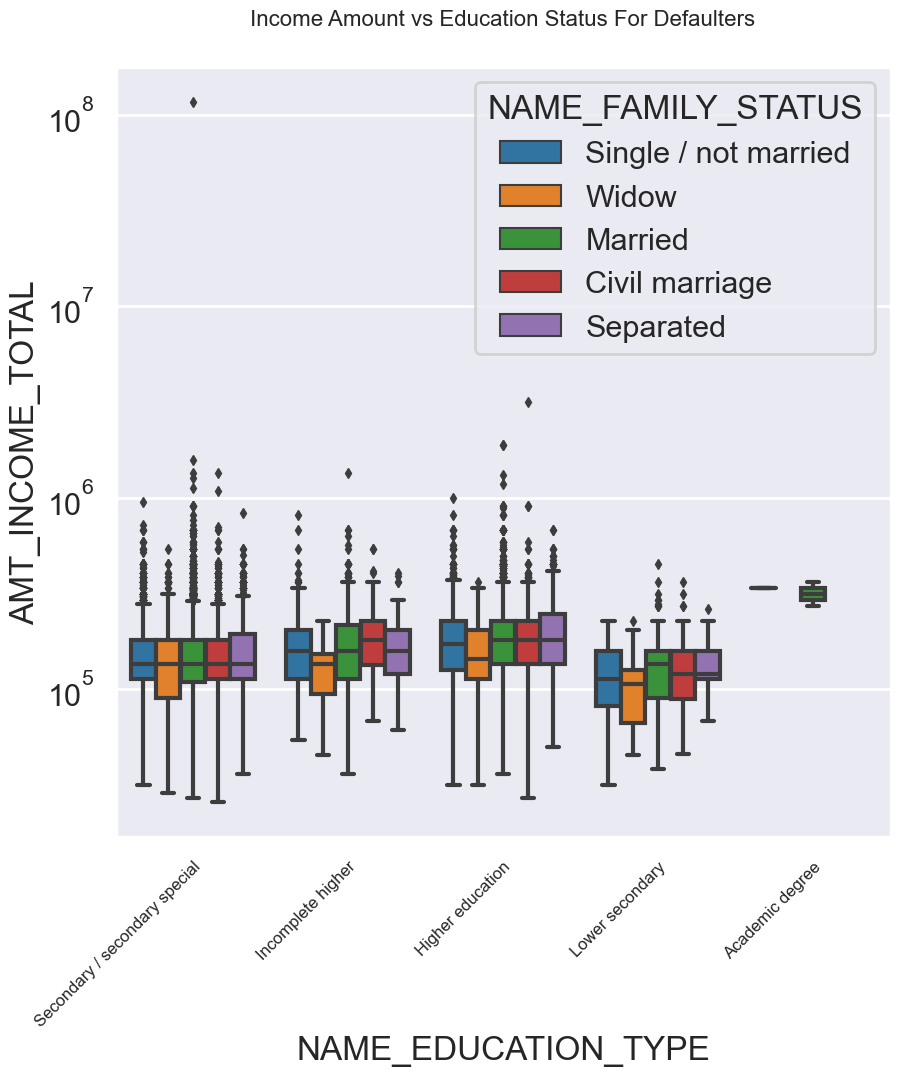

In [84]:
# Box plotting for Income amount vs Education Status for Target 1 in logarithmic scale

plt.figure(figsize=(10,10))
plt.xticks(rotation=45,ha="right",rotation_mode="anchor",fontsize=12)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income Amount vs Education Status For Defaulters',fontsize=16)
plt.show()

# Conclusion:

Points to be concluded from the above graph for target = 1 (Defaulters).

1. Have some similarity with Target0, From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status.

2. No outlier for Academic degree but there income amount is little higher than that Higher education.

3. Lower secondary are having less income amount than others.

# Segment2 - previous_application

In [85]:
#Read the dataset of "application_data" in inp0 dataframe
inp1=pd.read_csv("previous_application.csv")

In [86]:
#Display the first 5 records
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#check dataframe info
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [89]:
#check datatypes of each field in dataframe
inp1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [90]:
# Cleaning the missing data
# listing the null values columns having more than 50%

emptycol1=inp1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.5*len(emptycol1))]
len(emptycol1)

15

In [91]:
#Removing those 15 columns

emptycol1 = list(emptycol1[emptycol1.values>=0.5].index)
inp1.drop(labels=emptycol1,axis=1,inplace=True)
inp1.shape

(1670214, 22)

In [92]:
#Removing the column values of 'XNA' and 'XAP'
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
inp1.shape

(69635, 22)

In [95]:
#Merging the Application dataset with previous appliaction dataset
Merged_data=pd.merge(left=inp0,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [96]:
Merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [97]:
# Renaming the column names after merging
Merged_data = Merged_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [98]:
# Removing unwanted columns for analysis
Merged_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [99]:
#check shape of the Merged Data
Merged_data.shape

(59413, 91)

# Inference:

We can conclude the below points from the graph:

1.Most rejection of loans comes from 'Repairs'.

2.We have almost equal number of approves and rejection for Medicine,Every day expenses and education purposes.

3.Most rejections of loans comes from the 'Repairs': The graph indicates that the 'Repairs' category has the highest number of loan rejections. This suggests that loan applications for the purpose of repairs are more likely to be rejected compared to other purposes.

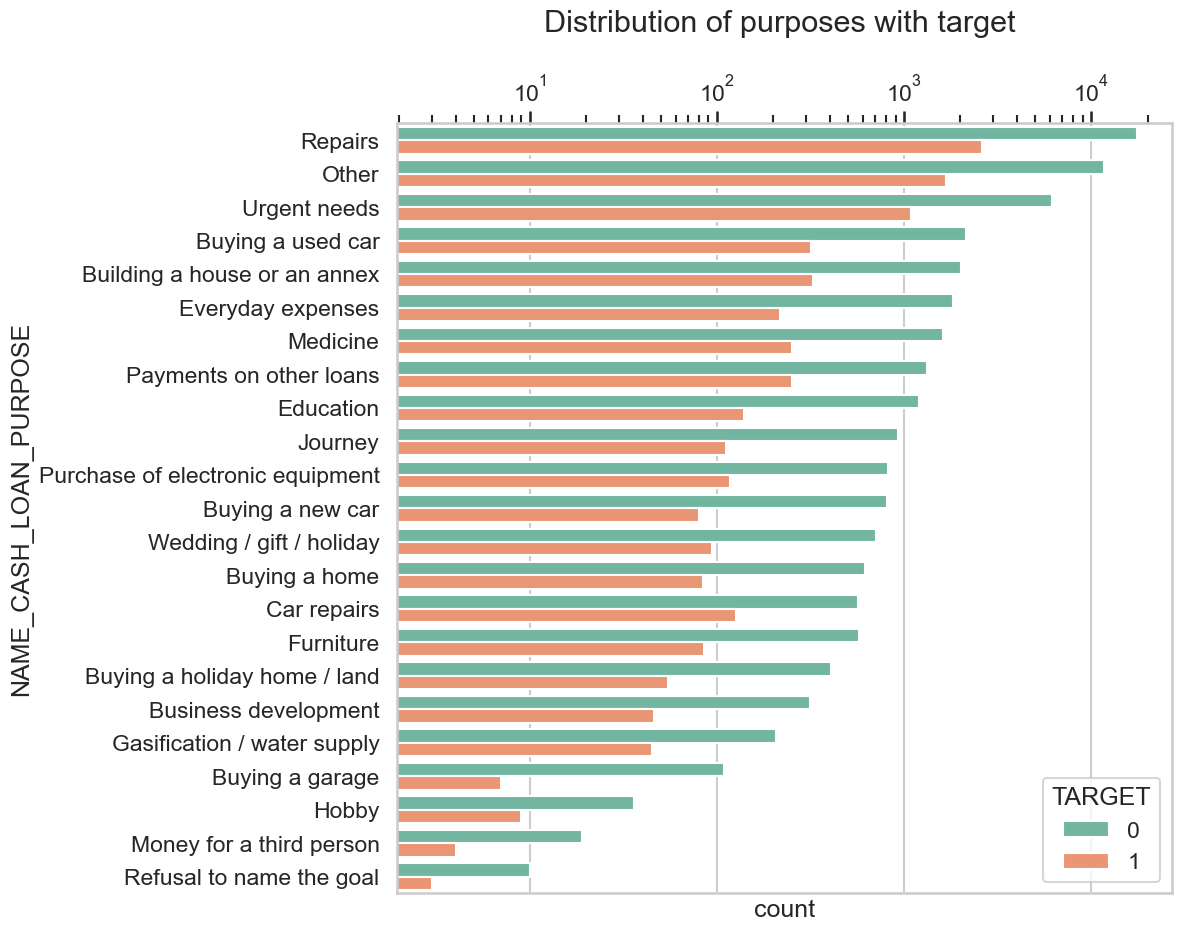

In [102]:
#Distribution of purposes with target

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,10))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = Merged_data, y= 'NAME_CASH_LOAN_PURPOSE',orient="h",
                   order=Merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue= 'TARGET',palette='Set2') 
ax.xaxis.tick_top()

# Inference:
we can conclude from above plot that Loan purposes with 'Repairs' are facing more difficulites in payment on time.

# Performing bivariate analysis

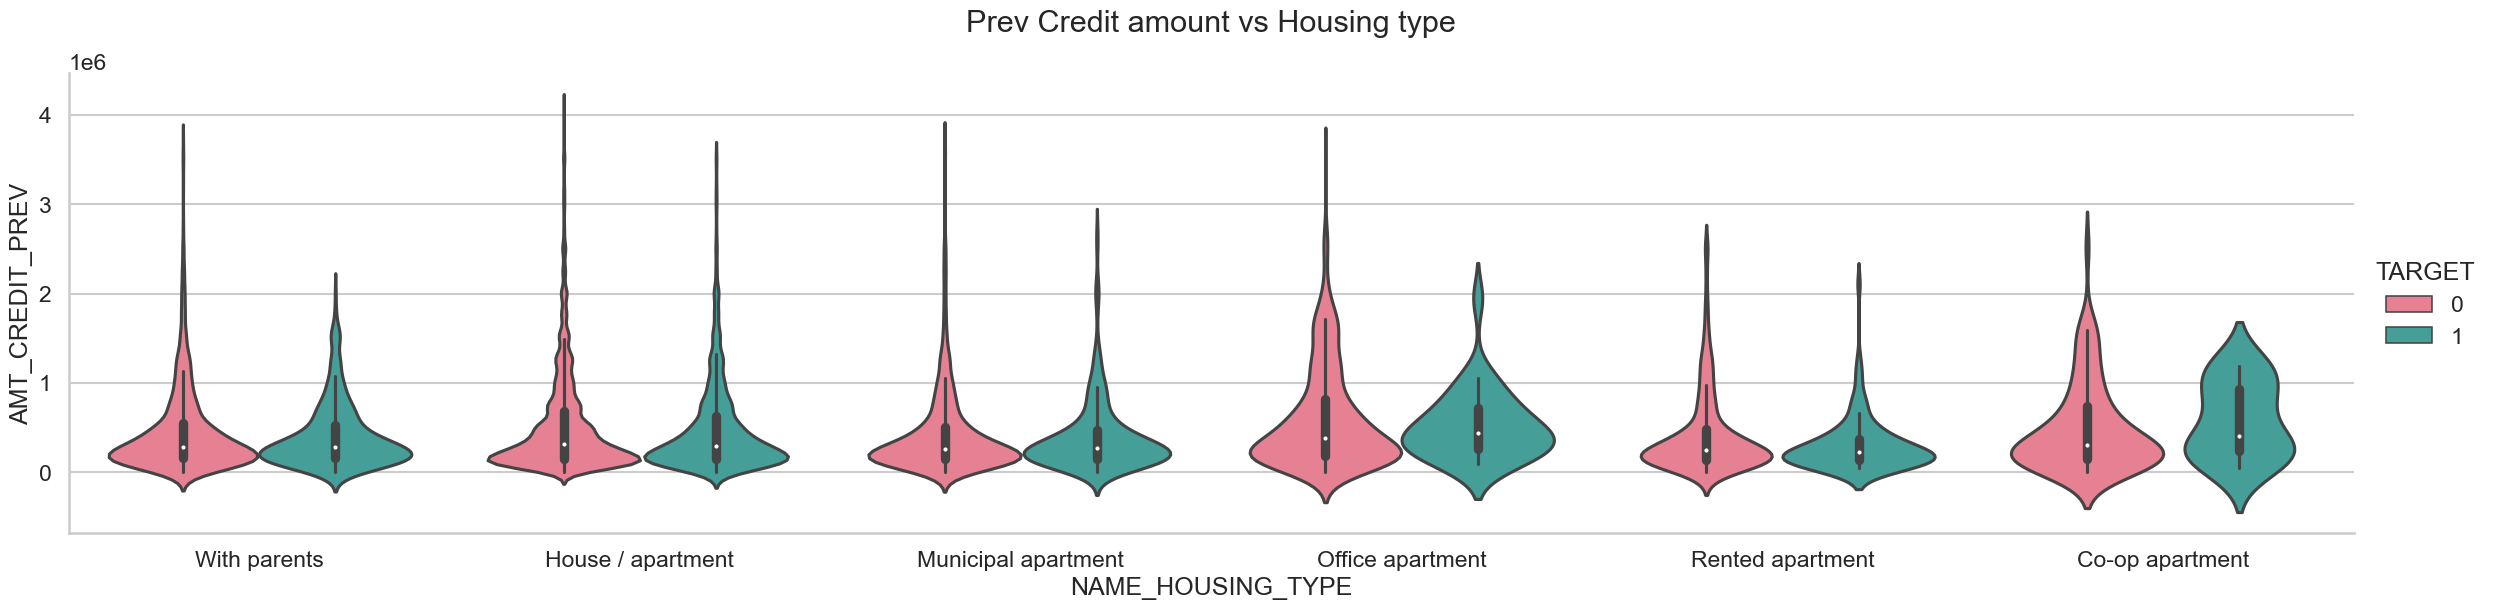

In [105]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale
sns.catplot(x="NAME_HOUSING_TYPE", y="AMT_CREDIT_PREV", hue="TARGET", data=Merged_data, kind="violin",height=6,aspect=4,palette='husl')
plt.title('Prev Credit amount vs Housing type')
plt.show()

# Conclusion:

We can draw the conclusion that banks should refrain from lending money for co-op apartment housing because the graph indicates payment troubles.